# 1 - Introdução

Objetivo: Data wrangling e Data analysis 

Para este projeto, selecionei o conjunto de dados do Titanic, que analisa as características de uma amostra dos passageiros do Titanic, incluindo se eles sobreviveram ou não, sexo, idade, tarifa (custo da passagem), classe e porto de embarque.
Depois de examinar o conteúdo do conjunto de dados, pensei que seria interessante examinar as seguintes perguntas:

- Qual gênero teve uma chance maior de sobrevivência?
- Qual classe social tinha maiores chances de sobrevivência?
- Qual faixa etária teve uma chance maior de sobrevivência?

## 2 - Importando os pacotes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style ("whitegrid")
from numbers import Number
import ipy_table as tbl
from scipy import stats
%matplotlib inline

## 3 - Abrindo e verificando o dataset

In [2]:
df = pd.read_csv("Titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4 - Data Wrangling

Verificando o número de variáveis com missing values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

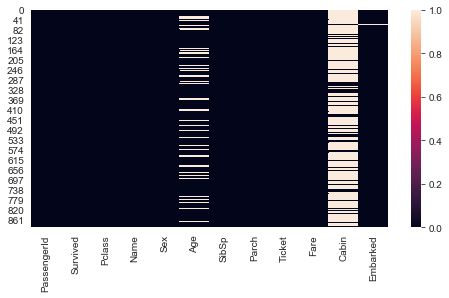

In [7]:
plt.figure (figsize=(8,4))
sns.heatmap (df.isnull())

Verificando o número de passageiros por sexo

In [8]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Verificando o número de passageiros por local de embarque

In [9]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Eliminando os missing values da coluna Age com a média da Pclass e Sex.

In [10]:
missing_ages = df[df['Age'].isnull()]
# determinando a média baseado no sexo e classe
mean_ages = df.groupby(['Sex','Pclass'])['Age'].mean()

def media_idades(row):

    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'],row['Pclass']]
    else:
        return row['Age']

df['Age'] =df.apply(media_idades, axis=1)

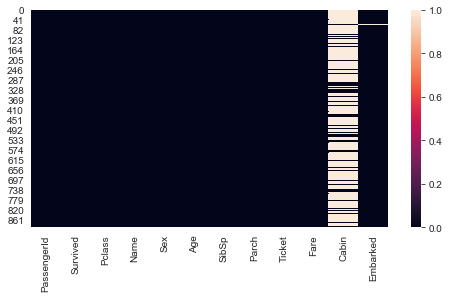

In [11]:
plt.figure (figsize=(8,4))
sns.heatmap (df.isnull())

### ELiminando as missing values da coluna Embarked

In [12]:
missing_ports = df[df['Embarked'].isnull()]
missing_ports

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
# Procurando pelo número do Ticket e Cabin
df[(df['Embarked'].notnull()) & ((df['Ticket'] == '113572') | (df['Cabin'] == 'B28'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Como a busca por registros semelhantes não retornou nenhum resultado interessante e parece que ambos estavam viajando na mesma cabine e com o mesmo número de passagem, e a maioria dos passageiros estavam viajando de Southampton, eu escolhi usar Southhampton como o valor que faltava


In [14]:
df['Embarked'].fillna('S',inplace=True)

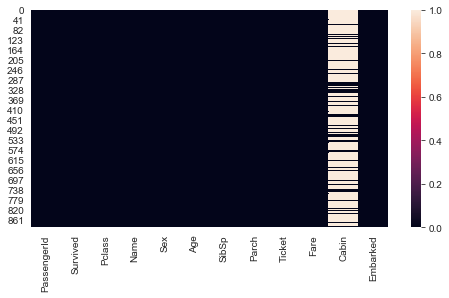

In [15]:
plt.figure (figsize=(8,4))
sns.heatmap (df.isnull())

### Eliminado as colunas indesejáveis

In [16]:
# dropping columns Cabin, Name and Ticket
df = df.drop(['Cabin','Name','Ticket'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 55.7+ KB


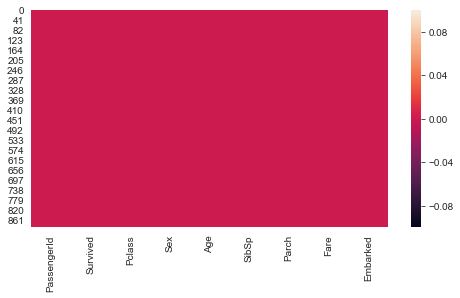

In [17]:
plt.figure (figsize=(8,4))
sns.heatmap (df.isnull())

### Mapeamento dos dados

Criando uma função para rotular os valores com novos valores ou strings atualizados.

In [18]:
def map_data(database):
    '''
    Function which takes the original dataframe and returns a 
    clean / updated dataframe
    '''
    # Embarked map
    port_map = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
    database['Embarked'] = database['Embarked'].map(port_map)
    
    # add nova coluna (FamilySize) ao dataframe - soma de SibSp e Parch
    database['FamilySize'] = database['SibSp'] + database['Parch']
    
    return database

df = map_data(df)
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,1,0,7.2500,Southampton,1
1,2,1,1,female,38.0,1,0,71.2833,Cherbourg,1
2,3,1,3,female,26.0,0,0,7.9250,Southampton,0


### As idades foram separadas por grupos para facilitar a análise.

In [19]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=age_labels)

## 5 - Análise exploratória

Criando funções

In [20]:
# CRIANDO FUNÇÕES PARA CALCULAR A PORCENTAGEM

def as_percent(val, precision='0.2'):
    """Convert number to percentage string."""
    if isinstance(val, Number ):
        return "{{:{}%}}".format(precision).format(val)
    else:
        raise TypeError("Numeric type required")

def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

Para a melhor compreensão dos dados, foi feito um comparativo entre os dados da população e da amostra.

In [21]:
# passengers and number of survivors based on Kaggle results
kaggle_passengers = 2224
kaggle_nonsurvivors = 1502
kaggle_survivors = kaggle_passengers - kaggle_nonsurvivors 

# Count number of passengers and number of survivors in sample data
sample_passengers = len(df)
sample_survivors = len(df[df.Survived==True])
sample_nonsurvivors = sample_passengers - sample_survivors


survivors_data = df[df.Survived==True]
non_survivors_data = df[df.Survived==False]

survivors = [
    ['Item','Kaggle (Count)','Kaggle (%)' ,'Sample Dataset (Count)', 'Sample Dataset (%)'],
    ['Total Passengers',kaggle_passengers,'-', sample_passengers,'-'],
    ['Survivors',
         kaggle_survivors,
         calculate_percentage(kaggle_survivors,kaggle_passengers, True), 
         sample_survivors,
         calculate_percentage(sample_survivors,sample_passengers, True) 
    ],
    ['Non-survivors', 
         kaggle_nonsurvivors,
         calculate_percentage(kaggle_nonsurvivors,kaggle_passengers, True), 
         sample_nonsurvivors,
         calculate_percentage(sample_nonsurvivors,sample_passengers, True) 
    ]
]
tbl.make_table(survivors)

Item,Kaggle (Count),Kaggle (%),Sample Dataset (Count),Sample Dataset (%)
Total Passengers,2224,-,891,-
Survivors,722,32.46%,342,38.38%
Non-survivors,1502,67.54%,549,61.62%


Contagem do número de passageiros e sobreviventes da amostra.

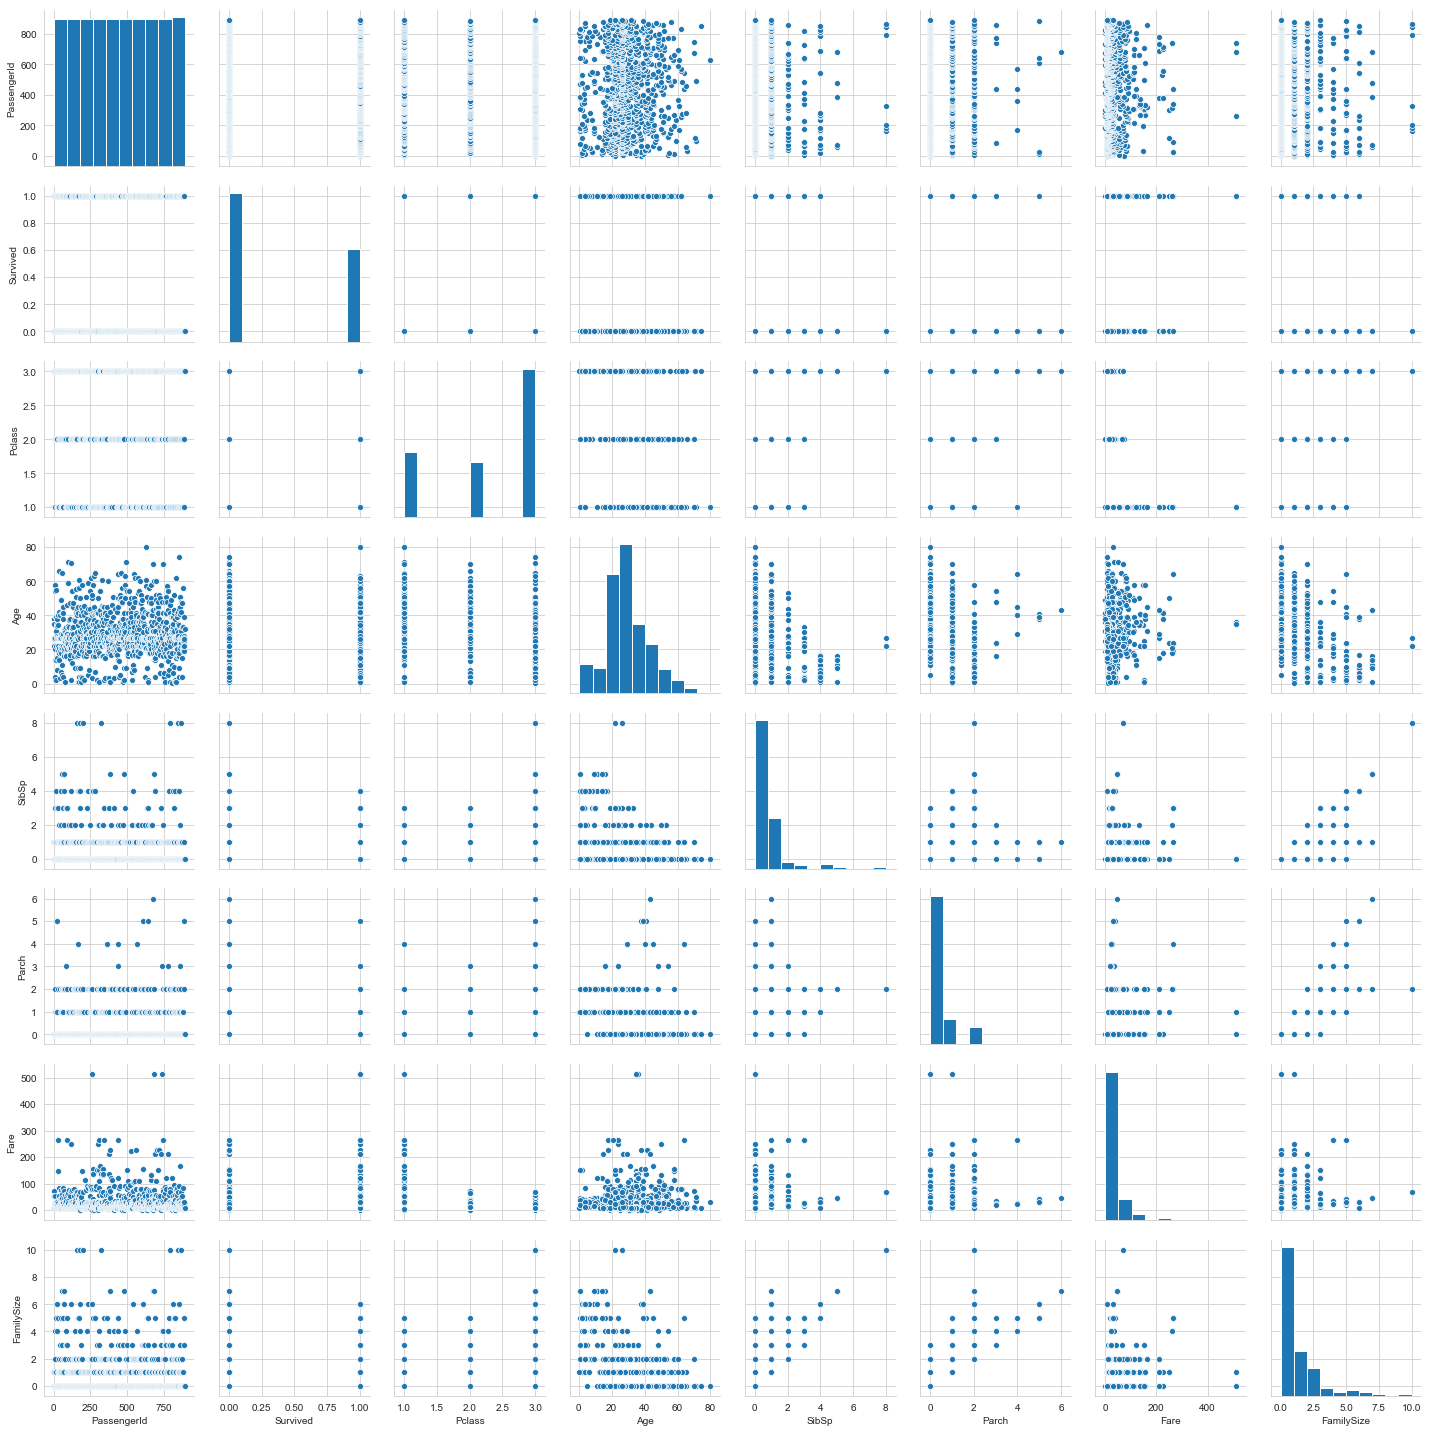

In [22]:
# Verificando a distribuição dos dados
sns.pairplot (data=df)

Text(0.5, 1.0, 'Histograma')

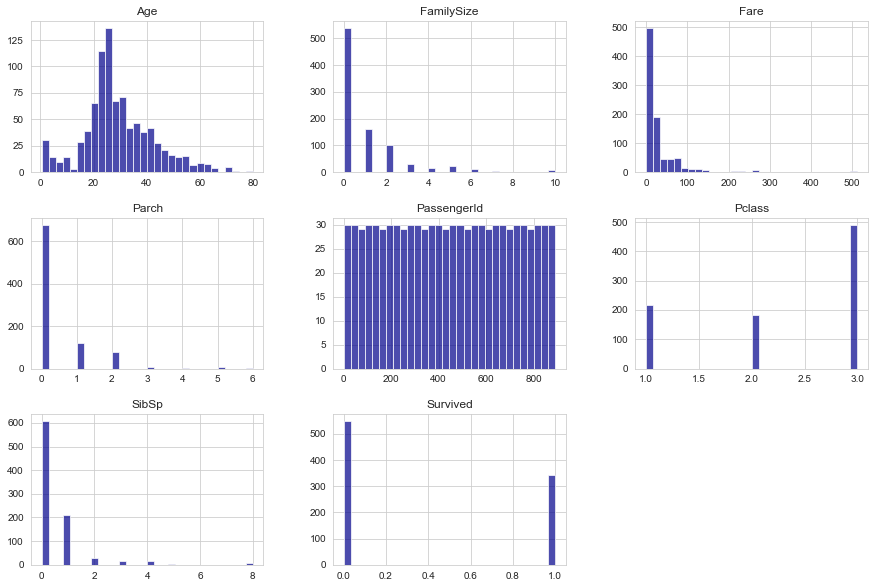

In [23]:
# Criando histogramas
df.hist(bins=30, color="darkblue", alpha=0.7, figsize=(15,10))
plt.title ("Histograma")

Text(0, 0.5, 'Quantidade de passageiros')

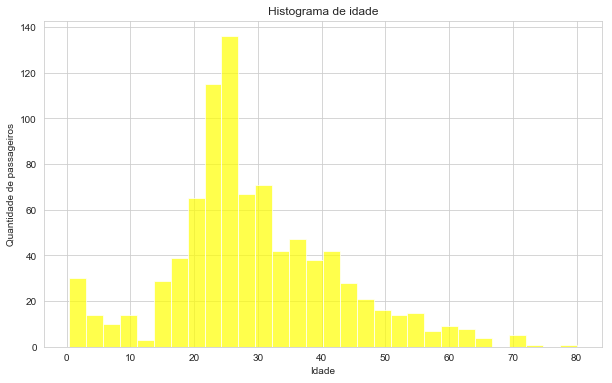

In [24]:
#Visualizando melhor o Histograma de Idade

df["Age"].hist(bins=30, color="yellow", alpha=0.7, figsize=(10,6))
plt.title ("Histograma de idade")
plt.xlabel ("Idade")
plt.ylabel ("Quantidade de passageiros")

Text(0, 0.5, 'quantidade de passageiros')

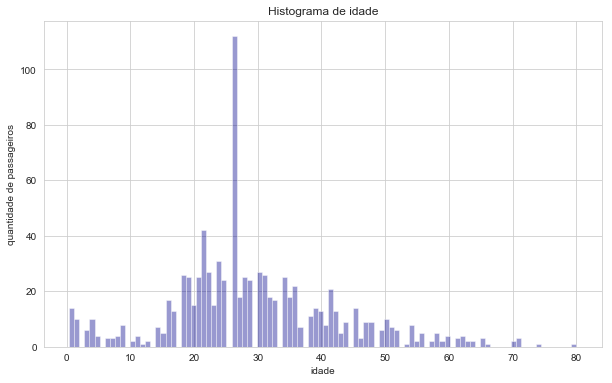

In [25]:
# Verificando a idade mais frequente

plt.figure (figsize=(10,6))
sns.distplot (df["Age"].dropna(), kde=False, bins=100, color="darkblue")
plt.title ("Histograma de idade")
plt.xlabel ("idade")
plt.ylabel ("quantidade de passageiros")

C:\Users\Wallace\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Idade')

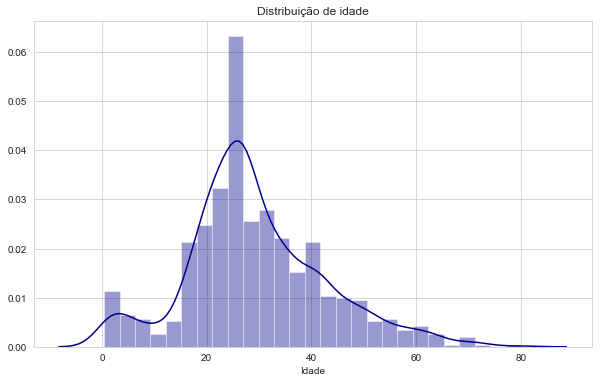

In [26]:
# gráfico de distribuição

plt.figure (figsize=(10,6))
sns.distplot (df["Age"].dropna(), color="darkblue" )
plt.title ("Distribuição de idade")
plt.xlabel ("Idade")

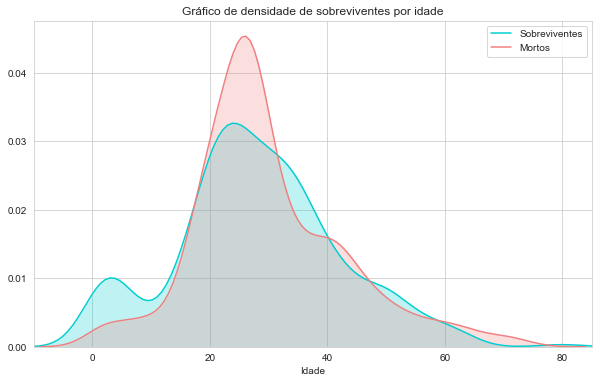

In [27]:
#Gráfico de densidade de sobreviventes por idade

plt.figure(figsize=(10,6))
sns.kdeplot(df["Age"][df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Age"][df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Sobreviventes', 'Mortos'])
plt.title('Gráfico de densidade de sobreviventes por idade')
plt.xlabel ("Idade")
plt.xlim(-10,85)
plt.show()

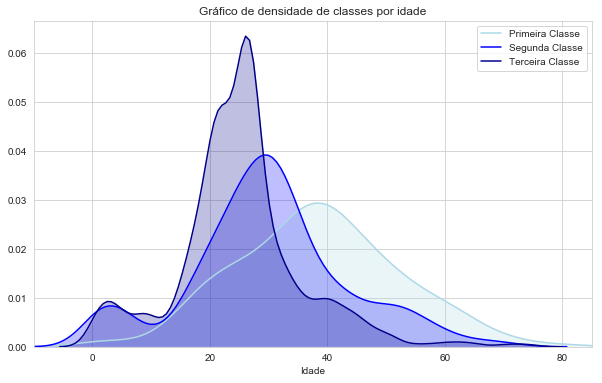

In [28]:
#Gráfico de densidade de classes por idade

plt.figure(figsize=(10,6))
sns.kdeplot(df["Age"][df.Pclass == 1], color="lightblue", shade=True)
sns.kdeplot(df["Age"][df.Pclass == 2], color="blue", shade=True)
sns.kdeplot(df["Age"][df.Pclass == 3], color="darkblue", shade=True)
plt.legend(['Primeira Classe', 'Segunda Classe', "Terceira Classe"])
plt.title('Gráfico de densidade de classes por idade')
plt.xlabel ("Idade")
plt.xlim(-10,85)
plt.show()

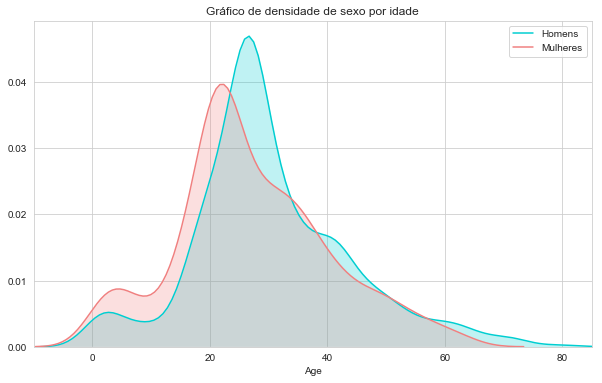

In [29]:
# Gráfico de densidade de sexo por idade

plt.figure(figsize=(10,6))
sns.kdeplot(df["Age"][df.Sex == "male"], color="darkturquoise", shade=True)
sns.kdeplot(df["Age"][df.Sex == "female"], color="lightcoral", shade=True)
plt.legend(['Homens', 'Mulheres'])
plt.title('Gráfico de densidade de sexo por idade')
plt.xlabel ("Age")
plt.xlim(-10,85)
plt.show()

Text(0, 0.5, 'número de pessoas')

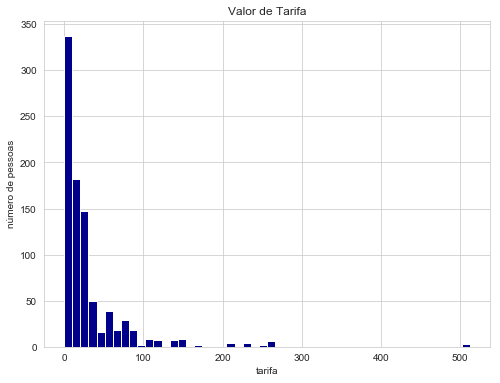

In [30]:
#Valor de tarifa

df["Fare"].hist(bins=50,color="darkblue", figsize=(8,6))
plt.title ("Valor de Tarifa")
plt.xlabel ("tarifa")
plt.ylabel ("número de pessoas")

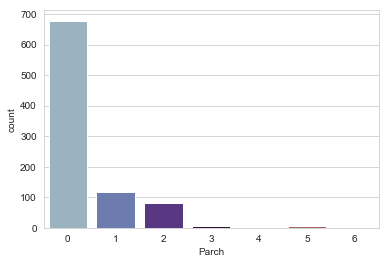

In [31]:
sns.countplot (x="Parch", data=df, palette="twilight")

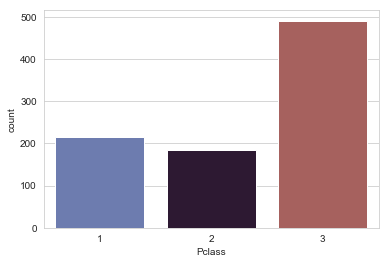

In [32]:
#Quantidade de pessoas por classe
sns.countplot (x="Pclass", data=df, palette="twilight")

Text(0.5, 1.0, 'Número de acompanhantes')

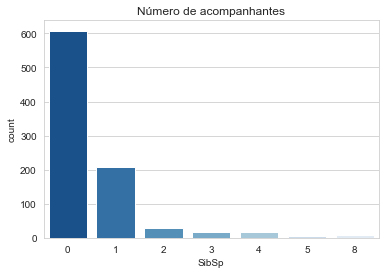

In [33]:
#Número de acompanhantes de cada indivíduo
sns.countplot ("SibSp", data=df, palette="Blues_r")
plt.title ("Número de acompanhantes")

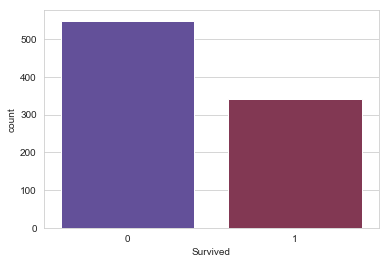

In [34]:
#Gráfico de sobreviventes
sns.countplot (x="Survived", data=df, palette ="twilight")

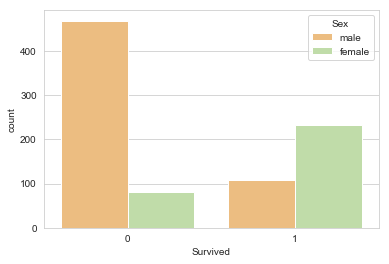

In [35]:
# Sobreviventes por sexo
sns.countplot ("Survived", data=df, hue="Sex", palette="Spectral")

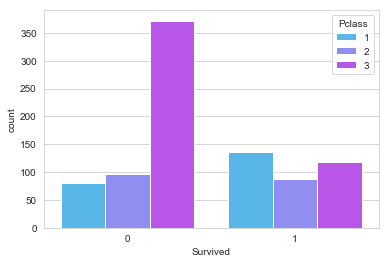

In [36]:
# Sobreviventes por Classe
sns.countplot ("Survived", data=df, hue="Pclass", palette="cool")

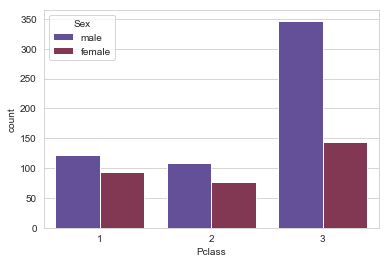

In [37]:
#Sobreviventes por sexo
sns.countplot ("Pclass", data=df, hue="Sex",palette="twilight")

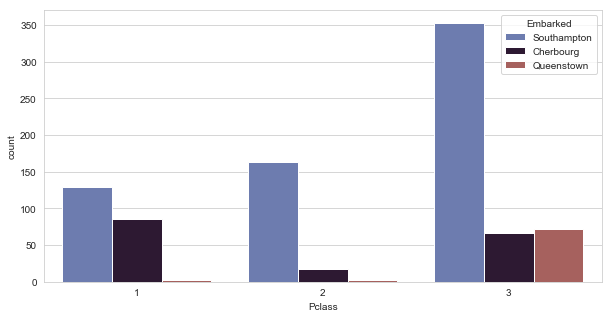

In [38]:
# Número de embarcados em cada cidade por Classe.
plt.figure (figsize=(10,5))
sns.countplot (x="Pclass", hue="Embarked", data=df, palette="twilight")

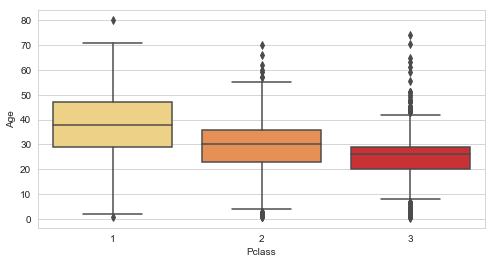

In [39]:
# Média de idade por Classe
plt.figure (figsize=(8,4))
sns.boxplot (x="Pclass", y="Age", data=df, palette="YlOrRd", )

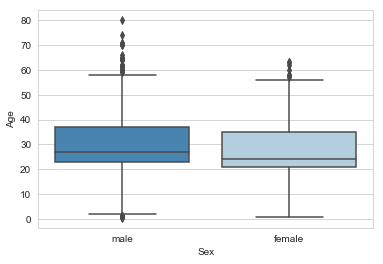

In [40]:
#Média de idade por sexo
plt.figure(figsize=(6,4))
sns.boxplot (x="Sex", y="Age", data=df, palette="Blues_r")

## Qual gênero teve maior chance de sobreviver??

### Teste de Hipóteses
A hipótese para a questão é se o gênero faz ou não impacto nas chances de sobrevivência.

H0 = O gênero não tem impacto na chance de sobrevivência

HA = O gênero tem impacto na chance de sobrevivência

### Contando o número de sobreviventes por sexo

In [41]:
table = pd.crosstab(df['Survived'],df['Sex'])
print (table)

Sex       female  male
Survived              
0             81   468
1            233   109


### Proporção de sobreviventes por sexo

In [42]:
print (df.groupby('Sex').Survived.mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Text(0.5, 1.0, '% de sobreviventes por gênero')

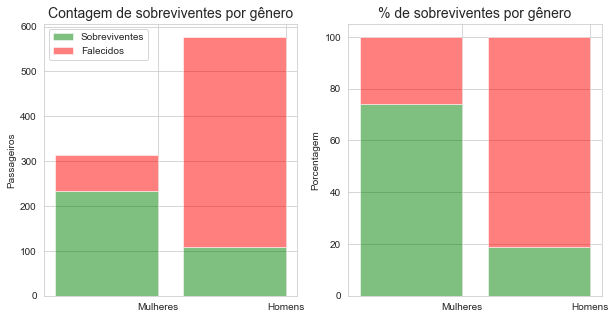

In [43]:
# calculate values for each survival status
survivors_gender = survivors_data.groupby(['Sex']).size().values
non_survivors_gender = non_survivors_data.groupby(['Sex']).size().values

# calculate totals for percentates
totals = survivors_gender + non_survivors_gender

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_gender, totals)*100 
data2_percentages = calculate_percentage(non_survivors_gender, totals)*100 

gender_categories = ['Mulheres', 'Homens']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Sobreviventes', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Falecidos', alpha=0.5,
color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4], gender_categories )
ax1.set_ylabel("Passageiros")
ax1.set_xlabel("")
ax1.set_title("Contagem de sobreviventes por gênero",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4],  gender_categories)
ax2.set_ylabel("Porcentagem")
ax2.set_xlabel("")
ax2.set_title("% de sobreviventes por gênero",fontsize=14)

### Testando a hipótese - Cálculo do Qui-Quadrado

In [44]:
table = pd.crosstab([df['Survived']], df['Sex'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,260.7170
P-Value,0.0000


Como o valor de P-Value é bem menor do que 0.05, a probabilidade do gênero impactar nas chances de sobrevivência é muito alta. Portanto, a hipótese nula pode ser rejeitada. Os gráficos facilmente confirmam isso.

## Qual classe social teve maior chance de sobreviver?

### Teste de Hipóteses

A hipótese para a questão é se a classe social faz ou não impacto nas chances de sobrevivência.

H0 = A classe social não tem impacto na chance de sobrevivência

HA = A classe social tem impacto na chance de sobrevivência

### Contando o número de sobreviventes por sexo

In [45]:
table = pd.crosstab(df['Survived'],df['Pclass'])
print (table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


### Proporção de sobreviventes por classe social

In [46]:
print (df.groupby('Pclass').Survived.mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Text(0.5, 1.0, '% de sobreviventes por classe')

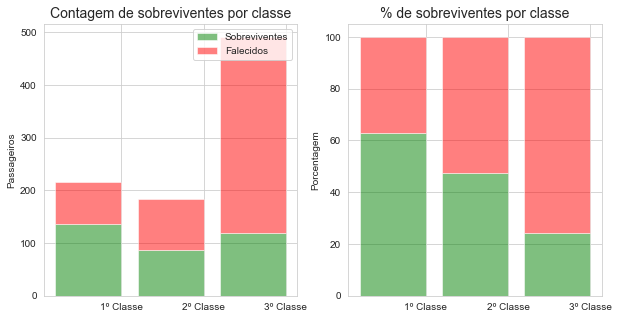

In [47]:
# calculate values for each survival status
survivors_class = survivors_data.groupby(['Pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['Pclass']).size().values

# calculate totals for percentates
totals = survivors_class + non_survivors_class

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_class, totals)*100 
data2_percentages = calculate_percentage(non_survivors_class, totals)*100 


class_categories = ['1º Classe', '2º Classe', '3º Classe']


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Sobreviventes', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Falecidos', alpha=0.5, 
color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4, 2.4], class_categories )
ax1.set_ylabel("Passageiros")
ax1.set_xlabel("")
ax1.set_title("Contagem de sobreviventes por classe",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax2.set_ylabel("Porcentagem")
ax2.set_xlabel("")
ax2.set_title("% de sobreviventes por classe",fontsize=14)

### Testando a hipótese - Cálculo do Qui-Quadrado

In [48]:
table = pd.crosstab([df['Survived']], df['Pclass'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,102.8890
P-Value,0.0000


Como o valor de P-Value é bem menor do que 0.05, a probabilidade da classe social impactar nas chances de sobrevivência é muito alta. Portanto, a hipótese nula pode ser rejeitada. Os gráficos facilmente confirmam isso.

## Qual classe social teve maior chance de sobreviver?

Teste de Hipóteses

A hipótese para a questão é se a faixa de idade faz ou não impacto nas chances de sobrevivência.

H0 = A faixa de idade não tem impacto na chance de sobrevivência

HA = A faixa de idade tem impacto na chance de sobrevivência

### Número de sobreviventes por faixa etária

20-29    358
30-39    185
40-49    110
10-19    102
0-9       62
50-59     48
60-69     19
70-79      6
Name: age_group, dtype: int64

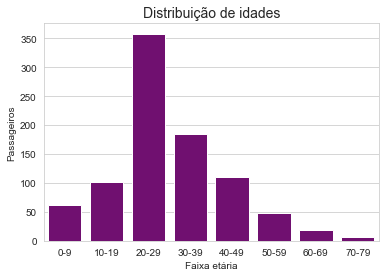

In [49]:
sns.countplot("age_group",data=df, color="purple")
plt.title("Distribuição de idades",fontsize=14)
plt.ylabel('Passageiros')
plt.xlabel('Faixa etária');

df["age_group"].value_counts()

### Proporção de sobreviventes por faixa etária

In [50]:
print (df.groupby(['age_group']).Survived.mean())

age_group
0-9      0.612903
10-19    0.401961
20-29    0.315642
30-39    0.454054
40-49    0.354545
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64


### Comparativo de sobreviventes por faixa etária

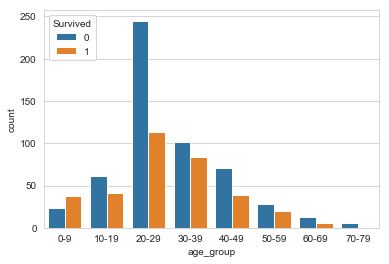

In [51]:
sns.countplot ("age_group", hue="Survived", data=df)

Text(0.5, 1.0, '% de sobreviventes por faixa etária')

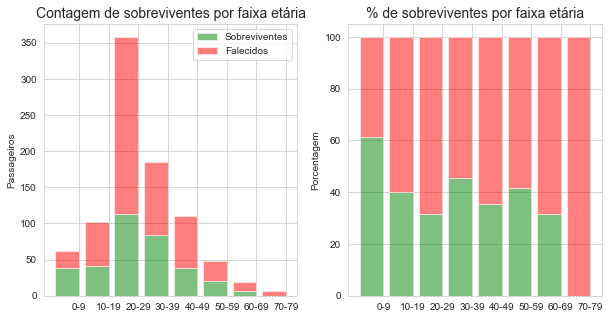

In [52]:
survivors_data = df[df.Survived==True]
non_survivors_data = df[df.Survived==False]

# calculate values for each survival status
survivors_age_group = survivors_data.groupby(['age_group']).size().values
non_survivors_age_group = non_survivors_data.groupby(['age_group']).size().values

# calculate totals for percentates
totals = survivors_age_group + non_survivors_age_group

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_age_group, totals)*100 
data2_percentages = calculate_percentage(non_survivors_age_group, totals)*100 


tick_spacing = np.array(range(len(age_labels)))+0.4


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_age_group)), survivors_age_group, label='Sobreviventes', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_age_group)), non_survivors_age_group, bottom=survivors_age_group, label='Falecidos', 
alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks(tick_spacing, age_labels )
ax1.set_ylabel("Passageiros")
ax1.set_xlabel("")
ax1.set_title("Contagem de sobreviventes por faixa etária",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks(tick_spacing,  age_labels)
ax2.set_ylabel("Porcentagem")
ax2.set_xlabel("")
ax2.set_title("% de sobreviventes por faixa etária",fontsize=14)

In [53]:
print (df.groupby(["Sex",'age_group']).Survived.mean())

Sex     age_group
female  0-9          0.633333
        10-19        0.755556
        20-29        0.681034
        30-39        0.855072
        40-49        0.687500
        50-59        0.888889
        60-69        1.000000
male    0-9          0.593750
        10-19        0.122807
        20-29        0.140496
        30-39        0.215517
        40-49        0.217949
        50-59        0.133333
        60-69        0.133333
        70-79        0.000000
Name: Survived, dtype: float64


### Proporção de sobreviventes por faixa etária e sexo

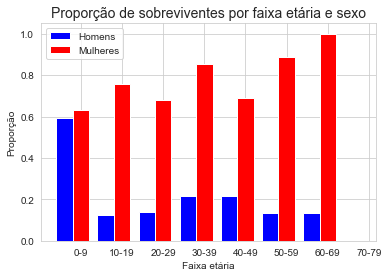

In [54]:
male_data = df[df.Sex == "male"].groupby('age_group').Survived.mean().values
female_data = df[df.Sex == "female"].groupby('age_group').Survived.mean().values
ax = plt.subplot()
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Homens',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Mulheres',color='r')
plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Proporção")
ax.set_xlabel("Faixa etária")
ax.set_title("Proporção de sobreviventes por faixa etária e sexo",fontsize=14)
plt.legend(loc='best')
plt.show()

In [55]:
table = pd.crosstab([df['Survived']], df['age_group'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,29.5389
P-Value,0.0001


Como o valor de P-Value é bem menor do que 0.05, a probabilidade da idade impactar nas chances de sobrevivência é muito alta. Portanto, a hipótese nula pode ser rejeitada. Os gráficos facilmente confirmam isso.

## 6 - Conclusão

### Limitações do dataset
Existem algumas limitações do dataset causadas por:

1 - missing values

2 - o dataset ser uma amostra


Os valores de 53 para os homens e 124 para as mulheres de idades faltando alteram um pouco o resultado real. Mas para
diminuir esse impacto ao invés de deletar as linhas, foi criada uma função para adicionar os valores faltantes com as idades
médias dos gêneros e classes podendo assim melhorar a acurácia da análise.

Outro fator é que por ser uma amostra, não podemos ter total certeza dos resultados, pois não sabemos se essa amostra do
titatic foi enviesada ou não. Contudo, acredito que os resultados foram satisfatórios.

